In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [10]:
# Min age is 17
# the maximum age of employees is 90
#the mean of Employees is 38.64

# the min hr per week is 1
#max is 90 
#avg is 40

# min is 1
#max is 16 irrelavant infomation about education

## EXPLORATORY DATA ANALYSIS

In [11]:
p_value = {}

In [12]:
def t_test(num, cat, data):
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = data[cat].unique()[0]
    un2 = data[cat].unique()[1]
    
    ind1 = data[data[cat]==un1]
    ind2 = data[data[cat]==un2]
    
    stat, p = ttest_ind(ind1[num], ind2[num])
    print('Test Statistics: ', stat)
    print('p-value: ', p)
    print('\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p
    

In [13]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(data[x], data[y])
    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
    else:
        print('Reject null hypothesis, ', Ha)
        
    return p

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

The number of people earning more than 50K dollars an year is one third of the people earning less than it.
We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in today's time!

In [14]:
# Value Count Function

<=50K    24720
>50K      7841
Name: income, dtype: int64

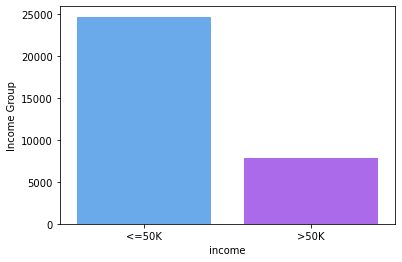

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='income',data=df, palette='cool')
plt.ylabel('Income Group')
df['income'].value_counts()


Dataset is highly imbalance .There is less than 25% 0f >50K income Category while more than 75% of ,=50K income.


<=50K    24720
>50K      7841
Name: income, dtype: int64

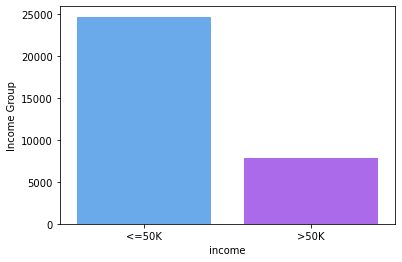

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='income',data=df, palette='cool')
plt.ylabel('Income Group')
df['income'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

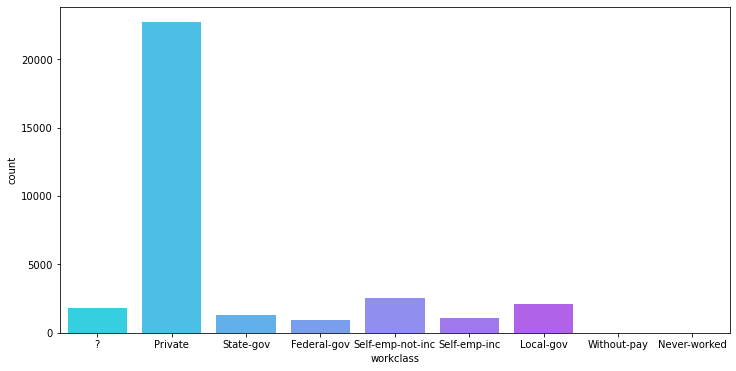

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass',data=df, palette='cool')
df['workclass'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


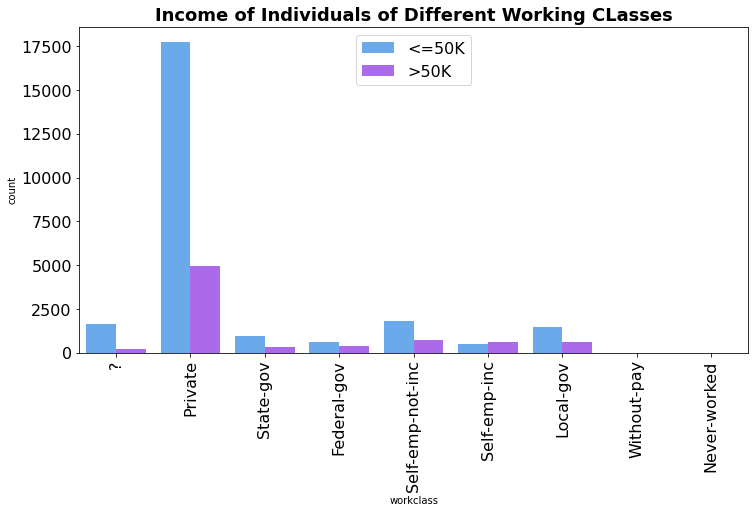

In [18]:
plt.figure(figsize=(12,6))

sns.countplot(df['workclass'], hue = df['income'], palette='cool')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [19]:
# Replacing ? with Mode value
df['workclass']=np.where(df['workclass']=='?',df['workclass'].mode(),df['workclass'])

In [20]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

Private           24532
Govt_employees     4351
Self_employed      3657
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

In [21]:
p_value['workclass'] = chi2('workclass', 'income', df)

Ho:  There is no significant assosiation between workclass and income (No predictability)
Ha:  There is a significant assosiation between workclass and income (Good predictor)


chi-square stats:  565.2798314418569
p-value:  5.056052612040767e-121


Reject null hypothesis,  There is a significant assosiation between workclass and income (Good predictor)


 In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

1.It is quite interesting to see that Self-Employed is the only category where the number of people
who earn more than 50K dollars exceed those earning less than it!

2.It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

## Education

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

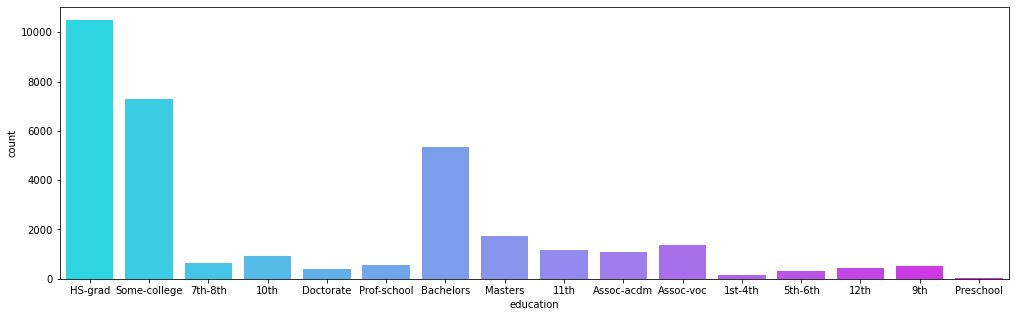

In [22]:
plt.figure(figsize=(17,5))
sns.countplot(x='education',data=df, palette='cool')
df['education'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


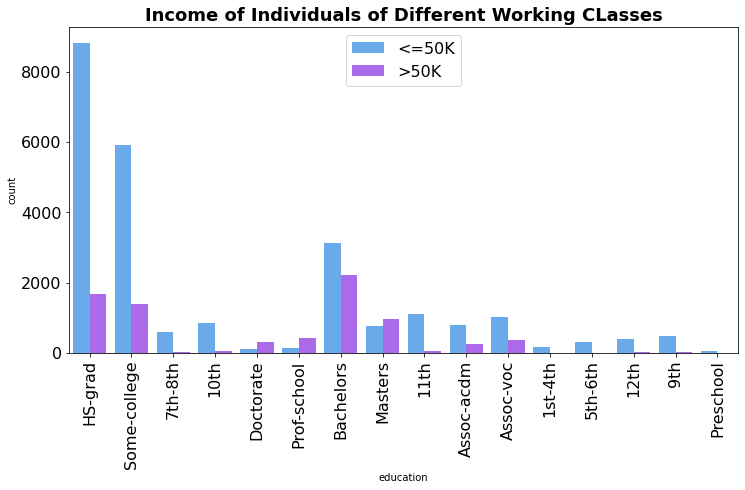

In [23]:
plt.figure(figsize=(12,6))

sns.countplot(df['education'], hue = df['income'], palette='cool')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

The people who have Bachlors degree  are have more income of >50000 income Its shows that Bachlor degree people earn more as compared to other qualificationHS student have more income group people of <50000

In [24]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

df['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

In [25]:
p_value['education'] = chi2('education', 'income', df)

Ho:  There is no significant assosiation between education and income (No predictability)
Ha:  There is a significant assosiation between education and income (Good predictor)


chi-square stats:  4298.283039213614
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between education and income (Good predictor)


## Marital.status

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

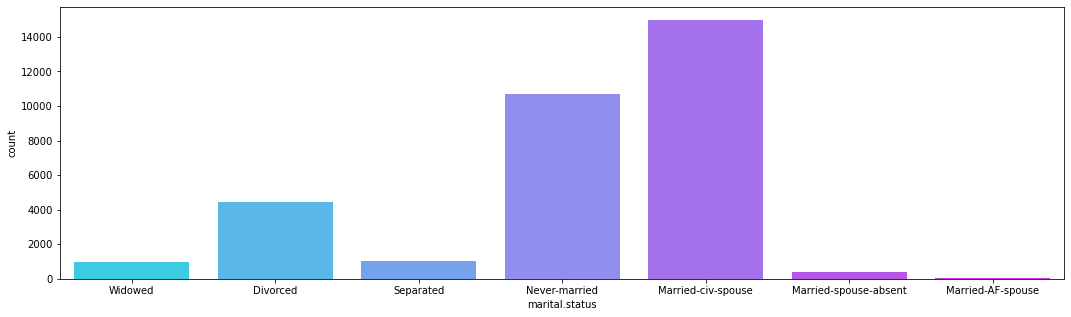

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(x='marital.status',data=df, palette='cool')
df['marital.status'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


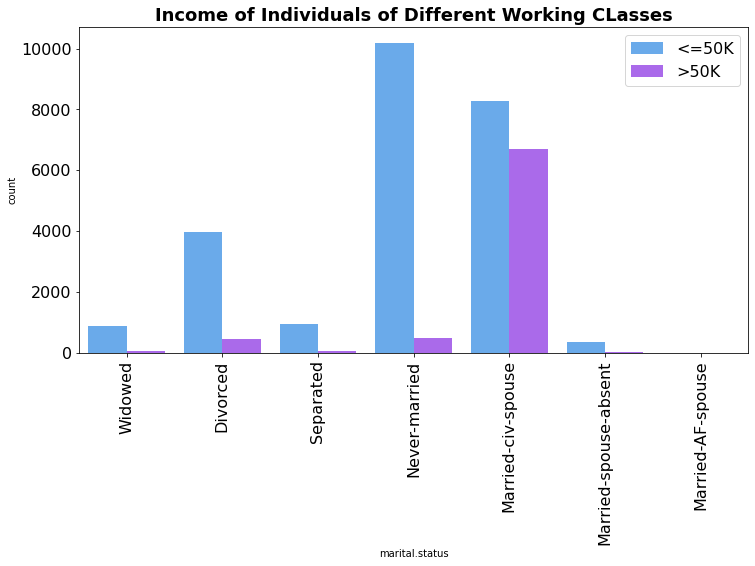

In [27]:
plt.figure(figsize=(12,6))

sns.countplot(df['marital.status'], hue = df['income'], palette='cool')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [28]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [29]:
p_value['marital.status'] = chi2('marital.status', 'income', df)

Ho:  There is no significant assosiation between marital.status and income (No predictability)
Ha:  There is a significant assosiation between marital.status and income (Good predictor)


chi-square stats:  6213.357374944818
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between marital.status and income (Good predictor)


## Occupation

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

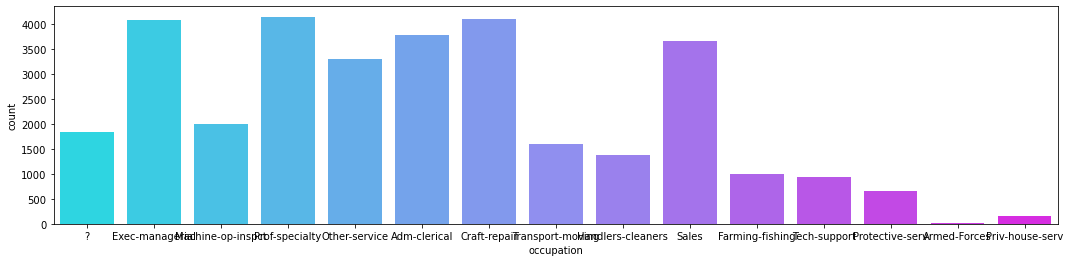

In [30]:
plt.figure(figsize=(18,4))
sns.countplot(x='occupation',data=df, palette='cool')
df['occupation'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


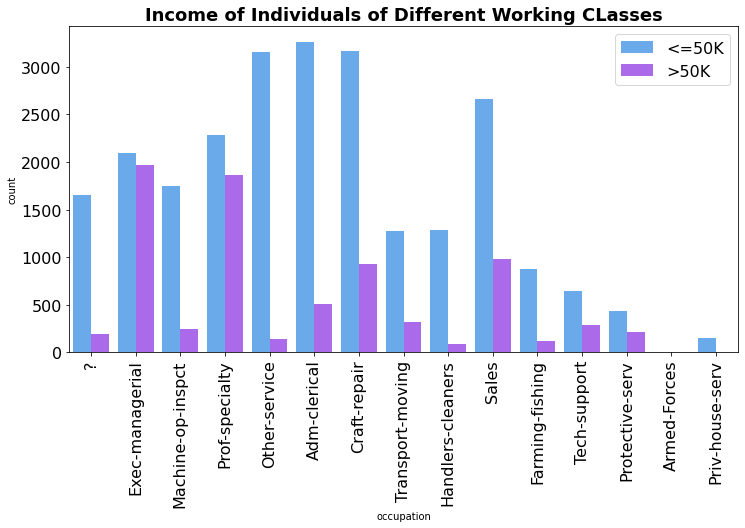

In [31]:
plt.figure(figsize=(12,6))

sns.countplot(df['occupation'], hue = df['income'], palette='cool')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [32]:
# Replacing ? with Mode value
df['occupation']=np.where(df['occupation']=='?',df['occupation'].mode(),df['occupation'])

In [33]:
p_value['occupation'] = chi2('occupation', 'income', df)

Ho:  There is no significant assosiation between occupation and income (No predictability)
Ha:  There is a significant assosiation between occupation and income (Good predictor)


chi-square stats:  3199.7833781310983
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between occupation and income (Good predictor)


## Relationship

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

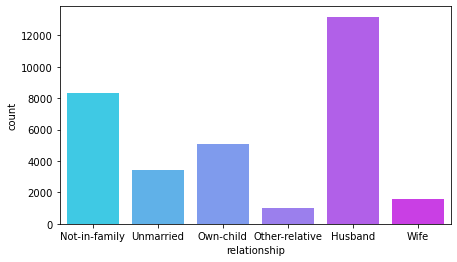

In [34]:
plt.figure(figsize=(7,4))
sns.countplot(x='relationship',data=df, palette='cool')
df['relationship'].value_counts()

In [35]:
p_value['relationship'] = chi2('relationship', 'income', df)

Ho:  There is no significant assosiation between relationship and income (No predictability)
Ha:  There is a significant assosiation between relationship and income (Good predictor)


chi-square stats:  6699.07689685885
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between relationship and income (Good predictor)


## race

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

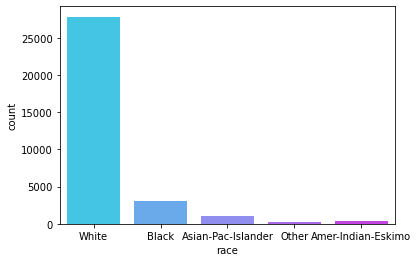

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='race',data=df, palette='cool')
df['race'].value_counts()

In [37]:
p_value['race'] = chi2('race', 'income', df)

Ho:  There is no significant assosiation between race and income (No predictability)
Ha:  There is a significant assosiation between race and income (Good predictor)


chi-square stats:  330.9204310085741
p-value:  2.305960610160958e-70


Reject null hypothesis,  There is a significant assosiation between race and income (Good predictor)


## SEX

Male      21790
Female    10771
Name: sex, dtype: int64

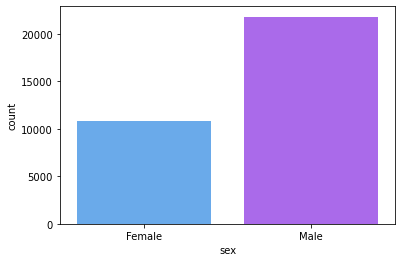

In [38]:
sns.countplot(x='sex',data=df,palette='cool')
df['sex'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


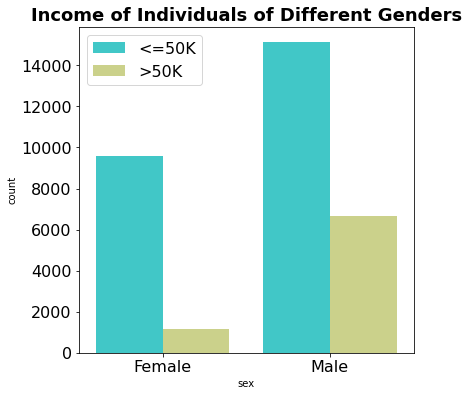

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(df['sex'], hue = df['income'], palette='rainbow')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [40]:
p_value['sex'] = chi2('sex', 'income', df)

Ho:  There is no significant assosiation between sex and income (No predictability)
Ha:  There is a significant assosiation between sex and income (Good predictor)


chi-square stats:  1517.813409134445
p-value:  0.0


Reject null hypothesis,  There is a significant assosiation between sex and income (Good predictor)


## Native.country

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

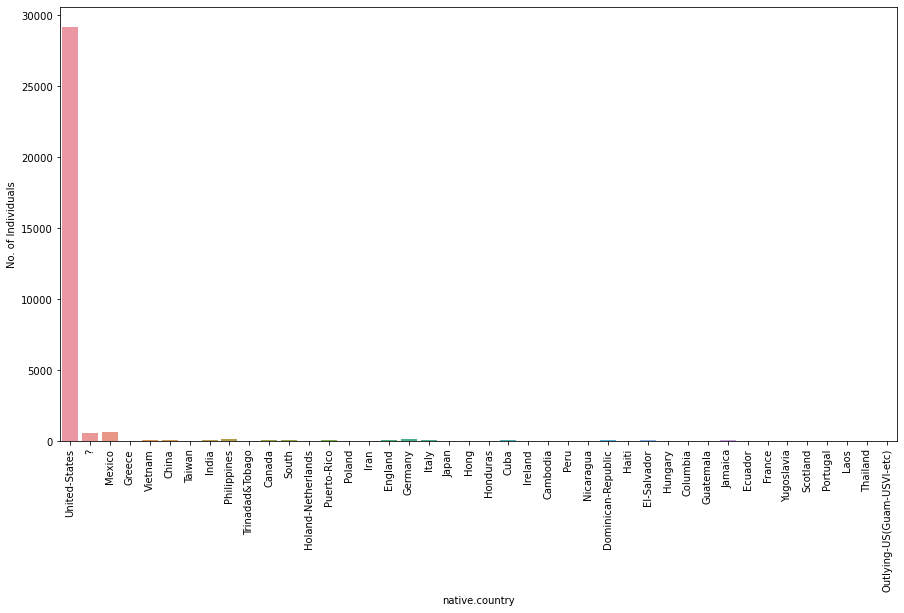

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(x='native.country',data=df)
plt.xticks(rotation=90)
plt.ylabel('No. of Individuals')
df['native.country'].value_counts()

In [42]:
# replace ? with mode value
df['native.country']=np.where(df['native.country']=='?',df['native.country'].mode(),df['native.country'])

In [43]:
p_value['native.country'] = chi2('native.country', 'income', df)

Ho:  There is no significant assosiation between native.country and income (No predictability)
Ha:  There is a significant assosiation between native.country and income (Good predictor)


chi-square stats:  317.16440125774454
p-value:  8.005212705688595e-45


Reject null hypothesis,  There is a significant assosiation between native.country and income (Good predictor)


Majority of the people working belong from U.S. whereas there are people who come to U.S. from their own countries but there no. is very low. Second highest no. of people belong from Mexico as it is a neighboring country.

## P-Values for contionous variable

In [44]:
p_value['age'] = t_test('age', 'income', df)

Ho:  There is no significant impact of age on income (No predictability)
Ha:  There is a significant impact of age on income (Good predictor)


Test Statistics:  -43.4362442404511
p-value:  0.0


Reject Ho,  There is a significant impact of age on income (Good predictor)


In [45]:
p_value['capital.gain'] = t_test('capital.gain', 'income', df)

Ho:  There is no significant impact of capital.gain on income (No predictability)
Ha:  There is a significant impact of capital.gain on income (Good predictor)


Test Statistics:  -41.34186816949368
p-value:  0.0


Reject Ho,  There is a significant impact of capital.gain on income (Good predictor)


In [46]:
p_value['capital.loss'] = t_test('capital.loss', 'income', df)

Ho:  There is no significant impact of capital.loss on income (No predictability)
Ha:  There is a significant impact of capital.loss on income (Good predictor)


Test Statistics:  -27.474177904925856
p-value:  2.6865471890579053e-164


Reject Ho,  There is a significant impact of capital.loss on income (Good predictor)


In [47]:
p_value['hours.per.week'] = t_test('hours.per.week', 'income', df)

Ho:  There is no significant impact of hours.per.week on income (No predictability)
Ha:  There is a significant impact of hours.per.week on income (Good predictor)


Test Statistics:  -42.583873499437956
p-value:  0.0


Reject Ho,  There is a significant impact of hours.per.week on income (Good predictor)


In [48]:
p_value['education.num'] = t_test('education.num', 'income', df)

Ho:  There is no significant impact of education.num on income (No predictability)
Ha:  There is a significant impact of education.num on income (Good predictor)


Test Statistics:  -64.18797223551665
p-value:  0.0


Reject Ho,  There is a significant impact of education.num on income (Good predictor)


In [49]:
p_value['fnlwgt'] = t_test('fnlwgt', 'income', df)

Ho:  There is no significant impact of fnlwgt on income (No predictability)
Ha:  There is a significant impact of fnlwgt on income (Good predictor)


Test Statistics:  1.7075109328052853
p-value:  0.08773666108063947


Fail to reject Ho,  There is no significant impact of fnlwgt on income (No predictability)


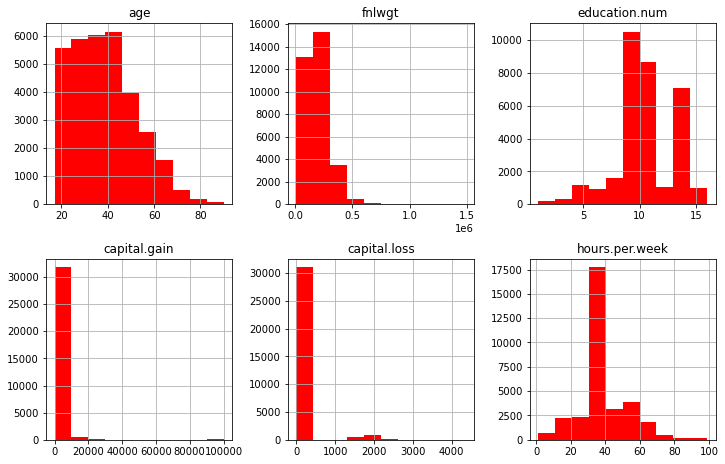

In [50]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False ,color='r');

Minimum 17
Maximum 90


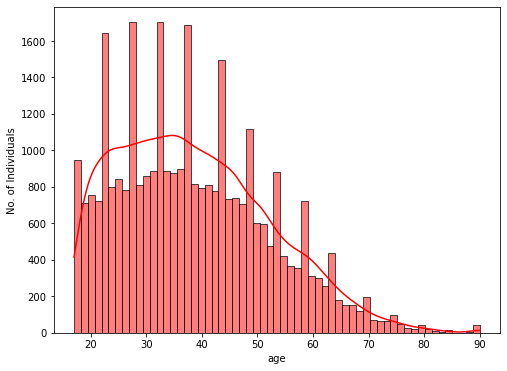

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'],kde=True,color='r')
plt.ylabel('No. of Individuals')
print('Minimum',df['age'].min())
print('Maximum',df['age'].max())

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

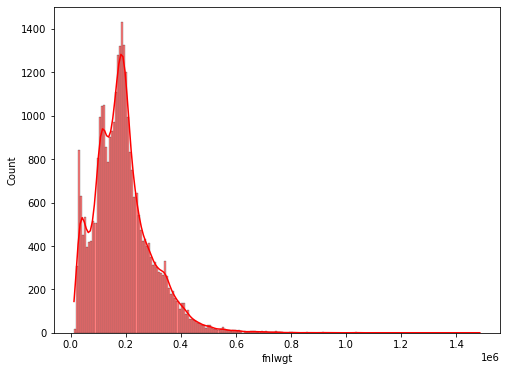

In [52]:
plt.figure(figsize=(8,6))
sns.histplot(df['fnlwgt'],kde=True,color='r')

Data does not follow normal distribution and data is rigt skewed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Minimum 0
Maximum 4356


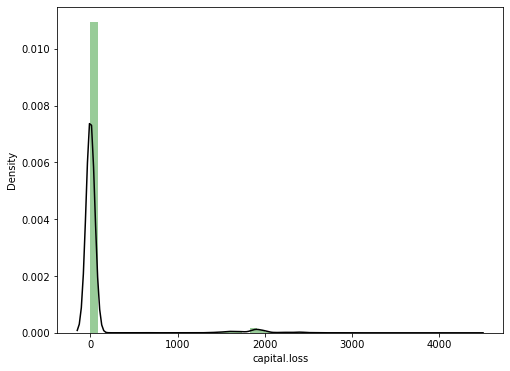

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(df['capital.loss'],color='g',kde_kws={'color':'k'})
print('Minimum',df['capital.loss'].min())
print('Maximum',df['capital.loss'].max())


Minimum Capital loss is 0 while the range goes on above 4000 but most of the people are with loss of 1000.There is a slight peak seen near 2000. data is highly skewed with long tail to the right side.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Minimum 1
Maximum 99


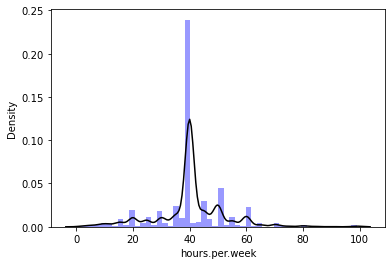

In [54]:
plt.figure(figsize=(6,4))
sns.distplot(df['hours.per.week'],color='b', kde_kws={"color": "k"})
print('Minimum',df['hours.per.week'].min())
print('Maximum',df['hours.per.week'].max())

Most of the people work 40 hours a day where there is a high chance that they belong to private sector. There are people working as low ass 1 hour a week and as high as 99 hours a week which undoubtfully might belong from the armed forces. Data shows less skewness compared to the other features in the dataframe.

## Separating categorical and continuous variables

In [55]:
#Separating categorical and continuous variables
cat=[feature for feature in df.columns if df[feature].nunique()<45]
cont=[feature for feature in df.columns if df[feature].nunique()>45]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

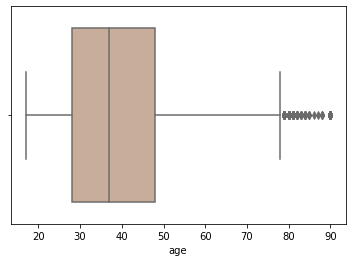

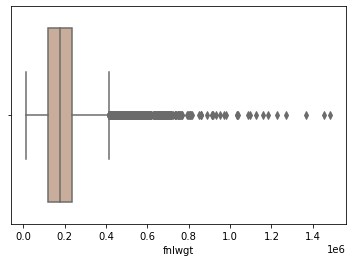

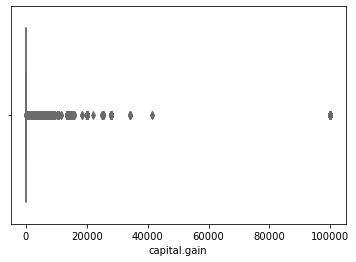

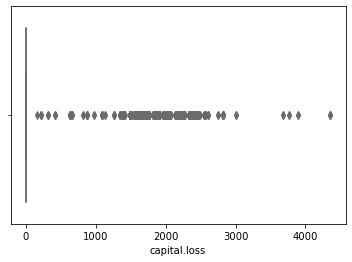

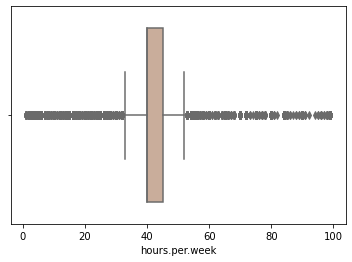

<Figure size 432x288 with 0 Axes>

In [56]:
for i in cont:
    sns.boxplot(df[i], palette= 'pink')
    plt.figure()

There are outliers in all the features, while capital gain and capital loss have very vast no. of outliers.

## Bivariate Analysis

<AxesSubplot:xlabel='income', ylabel='workclass'>

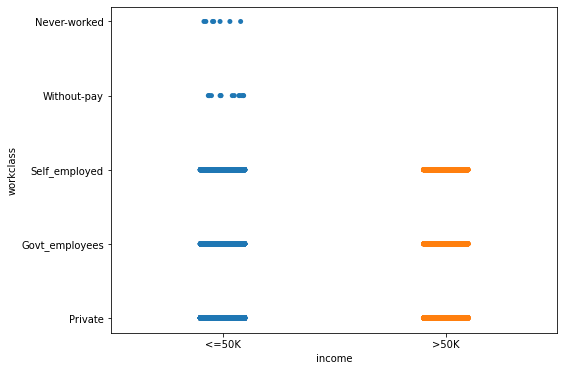

In [57]:
plt.figure(figsize=(8,6))
sns.stripplot(x='income',y='workclass',data=df)

There are individuals belonging from every workclass who earn >50k except for never worked and without pay, and even there no. is low in the <=50k category.

<AxesSubplot:xlabel='income', ylabel='occupation'>

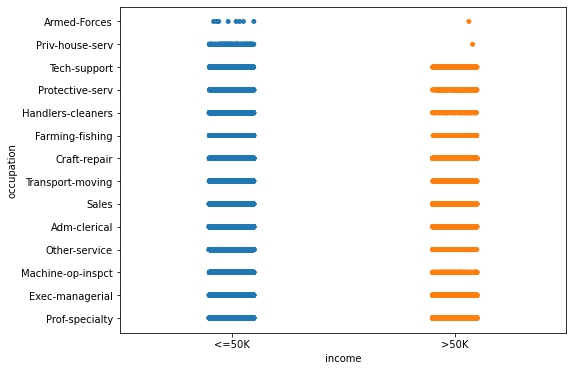

In [58]:
plt.figure(figsize=(8,6))
sns.stripplot(x='income',y='occupation',data=df)

 There are very few people with income greater than armed forces and private house service while all the other categories of people are distributed evenly in both the income categories.

<AxesSubplot:xlabel='income', ylabel='marital.status'>

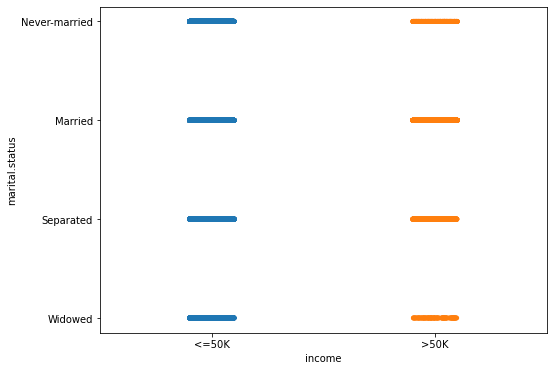

In [59]:
plt.figure(figsize=(8,6))
sns.stripplot(x='income',y='marital.status',data=df)

There are less no. of individual who are married armed forces spouse, thats why the no. is less in both the categories while people with married spouse absent are less in >50k category income comparatively.

<AxesSubplot:xlabel='income', ylabel='native.country'>

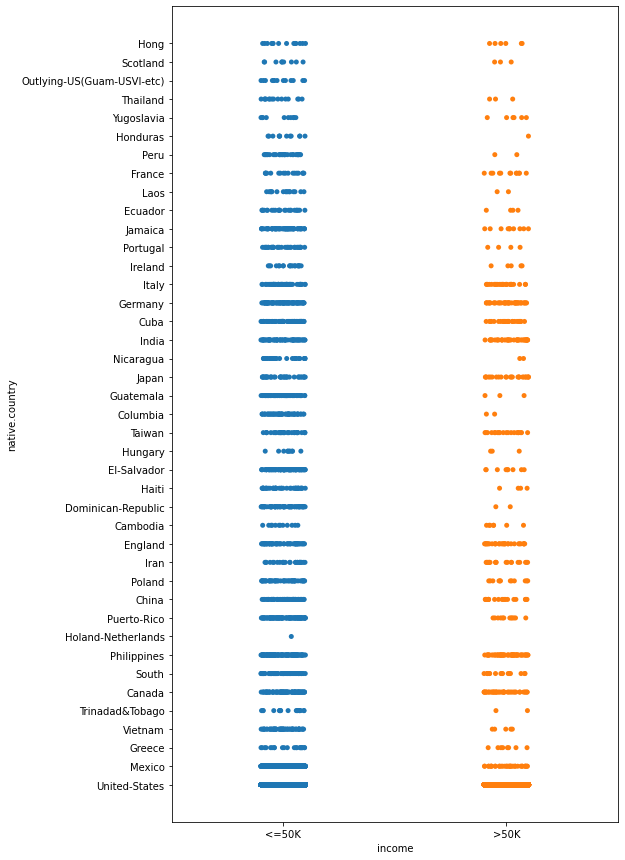

In [60]:
plt.figure(figsize=(8,15))
sns.stripplot(x='income',y='native.country',data=df)

The grapghs shows people belonging to diff countries have less chances of earning >50k which is wrong, this is because no. of individuals belonging from other countries other than U.S are very low nut it is to be noticed that there are more people in the category <=50k than >50k.

<AxesSubplot:xlabel='income', ylabel='age'>

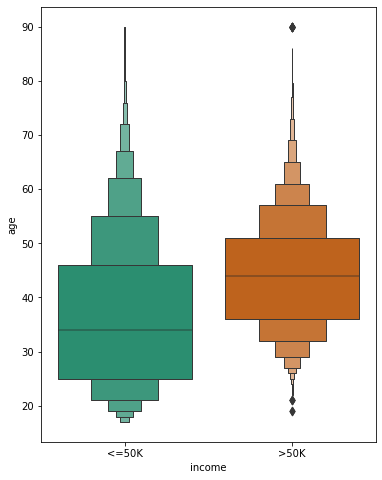

In [61]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='income',y='age',data=df,palette='Dark2')

### People with higher mean age earn >50k while there are individuals earning <=50k even wat very high age.

<AxesSubplot:xlabel='income', ylabel='capital.gain'>

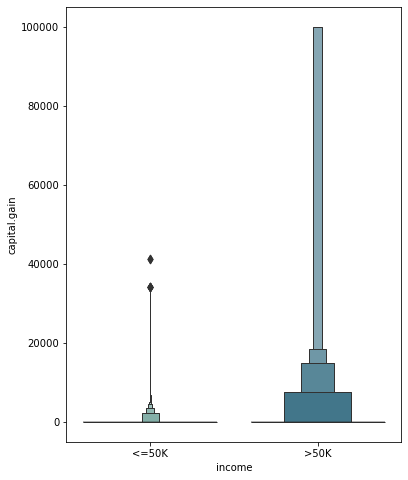

In [62]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='income',y='capital.gain',data=df,palette="crest")

### As the capital gain increases more people fall into >50k salary while mean of both categories remain cloase to zero capital.gain

<AxesSubplot:>

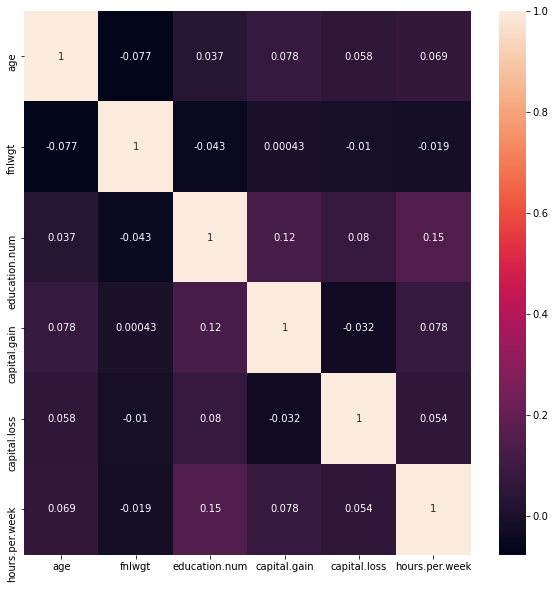

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## FEATURES ENGINEERING

In [64]:
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital.gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (32561, 15)
Number of observation after removing: (32402, 15)


In [65]:
del_cols = ['relationship','education.num']
df.drop(labels = del_cols,axis = 1,inplace = True)

## Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [67]:
#We use ordinal encoder to Encode Independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='income':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

In [68]:
#We use label encoder to encode label 
df['income']=l.fit_transform(df['income'])

In [69]:
from scipy.stats import zscore

In [70]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        data=df.copy()
        data=data[(z<i).all(axis=1)]
        loss=(df.shape[0]-data.shape[0])/df.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [71]:
z=np.abs(zscore(df))
threshold()

With threshold 3.0 data loss is 15.55%
With threshold 3.2 data loss is 12.18%
With threshold 3.4 data loss is 11.47%
With threshold 3.6 data loss is 10.9%
With threshold 3.8 data loss is 10.2%
With threshold 4.0 data loss is 9.51%
With threshold 4.2 data loss is 8.72%
With threshold 4.4 data loss is 7.18%
With threshold 4.6 data loss is 5.81%
With threshold 4.8 data loss is 4.47%


From above we choose threhold as 4.2 as data is precious and we cannot afford to lose more than 8% of data.

In [72]:
df=df[(z<4.2).all(axis=1)]

## Removing Skewness

In [73]:
# using power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [74]:
for i in cont:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

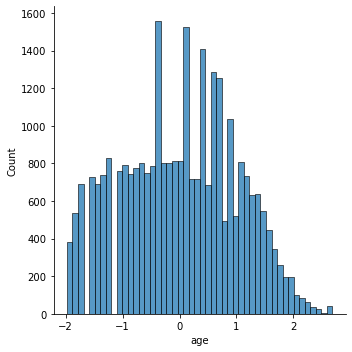

<Figure size 432x288 with 0 Axes>

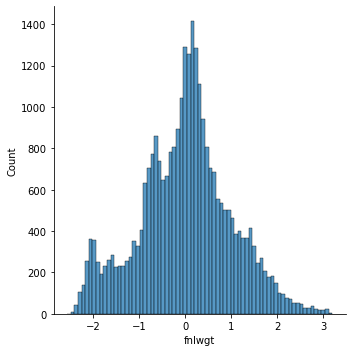

<Figure size 432x288 with 0 Axes>

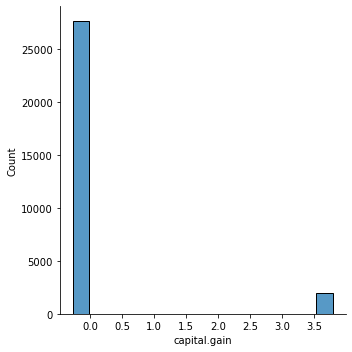

<Figure size 432x288 with 0 Axes>

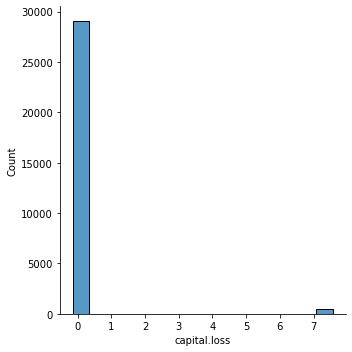

<Figure size 432x288 with 0 Axes>

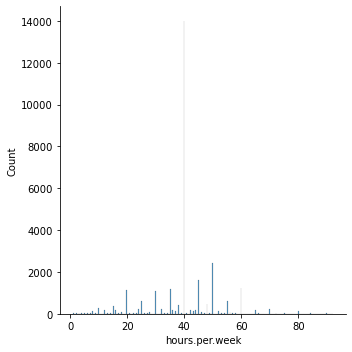

<Figure size 432x288 with 0 Axes>

In [75]:
for i in cont:
    sns.displot(df[i])
    plt.figure()

A lot of skewness has been resuced but we cannot remove skewness more than this

In [76]:
# separating dependent and independent features.
x=df.copy()
x.drop('income',axis=1,inplace=True)
y=df['income']

## Handling Imbalanced Data

In [78]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [79]:
x,y=over.fit_resample(x,y)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    23380
0    23380
Name: income, dtype: int64

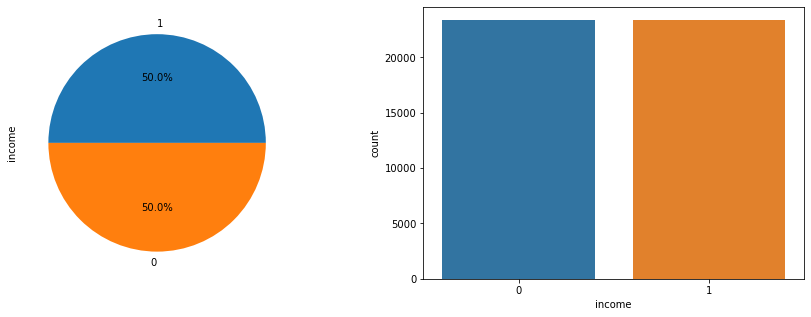

In [80]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

## Scaling the data

In [81]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [82]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [83]:
x

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.188211,0.50,0.132137,0.444444,0.333333,0.538462,1.0,0.0,0.00000,1.0,0.428571,0.931034
1,0.087450,0.50,0.328877,0.444444,0.000000,0.692308,0.0,0.0,0.00000,1.0,0.428571,0.793103
2,0.275562,0.75,0.520174,0.888889,0.333333,1.000000,1.0,1.0,0.00000,1.0,0.428571,0.931034
3,0.725254,0.50,0.533270,0.444444,0.666667,0.846154,1.0,0.0,0.00000,1.0,0.318681,0.931034
4,0.188211,0.50,0.258385,0.444444,0.333333,0.846154,1.0,0.0,0.00000,1.0,0.340659,0.931034
...,...,...,...,...,...,...,...,...,...,...,...,...
46755,0.582503,0.50,0.303170,0.444444,0.000000,0.225350,1.0,1.0,0.00000,0.0,0.483516,0.931034
46756,0.372007,0.50,0.475995,0.222222,0.467578,0.230769,1.0,0.0,0.00000,0.0,0.483516,0.931034
46757,0.696454,0.50,0.814708,0.516719,0.000000,0.692308,1.0,1.0,0.00000,0.0,0.428571,0.931034
46758,0.531623,0.50,0.510345,0.222222,0.000000,0.207180,1.0,1.0,0.00000,0.0,0.483516,0.931034


## Import necessary library

In [86]:
#We import Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [89]:
X = df.drop(['income'], axis=1)
y = df['income']

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [91]:
X.shape


(29576, 12)

In [92]:
y.shape

(29576,)

In [93]:
X.head()

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country
993,-1.100202,2.0,-1.813877,4.0,1.0,7.0,4.0,0.0,-0.263705,7.564421,40,38.0
994,-1.569808,2.0,-0.677136,4.0,0.0,9.0,1.0,0.0,-0.263705,7.564421,40,34.0
995,-0.693098,3.0,0.428154,8.0,1.0,13.0,4.0,1.0,-0.263705,7.564421,40,38.0
996,1.402712,2.0,0.503819,4.0,2.0,11.0,4.0,0.0,-0.263705,7.564421,30,38.0
997,-1.100202,2.0,-1.084430,4.0,1.0,11.0,4.0,0.0,-0.263705,7.564421,32,38.0


## Model 1: Logistic Regression

In [94]:
model1 = LogisticRegression()

In [95]:
model1.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred = model1.predict(X_test)

In [97]:
y_pred_proba = model1.predict_proba(X_test)

### Model evaluation

In [98]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [99]:
accuracy_score(y_test, y_pred)

0.8037867688493182

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7056
           1       0.54      0.30      0.39      1817

    accuracy                           0.80      8873
   macro avg       0.69      0.62      0.63      8873
weighted avg       0.78      0.80      0.78      8873



## Model 2: Random Forest Classifier(Hyperparameter tuning)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model2 = RandomForestClassifier(n_estimators=500)

In [103]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [104]:
y_pred = model2.predict(X_test)

### Model evaluation

In [105]:
accuracy_score(y_test, y_pred)

0.8436830835117773

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7056
           1       0.65      0.51      0.57      1817

    accuracy                           0.84      8873
   macro avg       0.77      0.72      0.74      8873
weighted avg       0.83      0.84      0.84      8873



## Model3: Support Vector Machines

In [107]:
from sklearn.svm import SVC

In [108]:
model3 = SVC()

In [109]:
model3.fit(X_train, y_train)

SVC()

In [110]:
y_pred = model3.predict(X_test)

In [111]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Model evaluation

In [112]:
accuracy_score(y_test, y_pred)

0.7952214583568128

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7056
           1       0.00      0.00      0.00      1817

    accuracy                           0.80      8873
   macro avg       0.40      0.50      0.44      8873
weighted avg       0.63      0.80      0.70      8873



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 5: KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
model5 = KNeighborsClassifier()

In [116]:
model5.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
y_pred = model5.predict(X_test)

In [118]:
### Model Evaluation

In [119]:
accuracy_score(y_test, y_pred)

0.8126901837033698

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7056
           1       0.55      0.47      0.51      1817

    accuracy                           0.81      8873
   macro avg       0.71      0.69      0.70      8873
weighted avg       0.80      0.81      0.81      8873



In [ ]:
## Decision tree

In [121]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [122]:
clffit = clf.fit(X_train, y_train)
clffit

DecisionTreeClassifier()

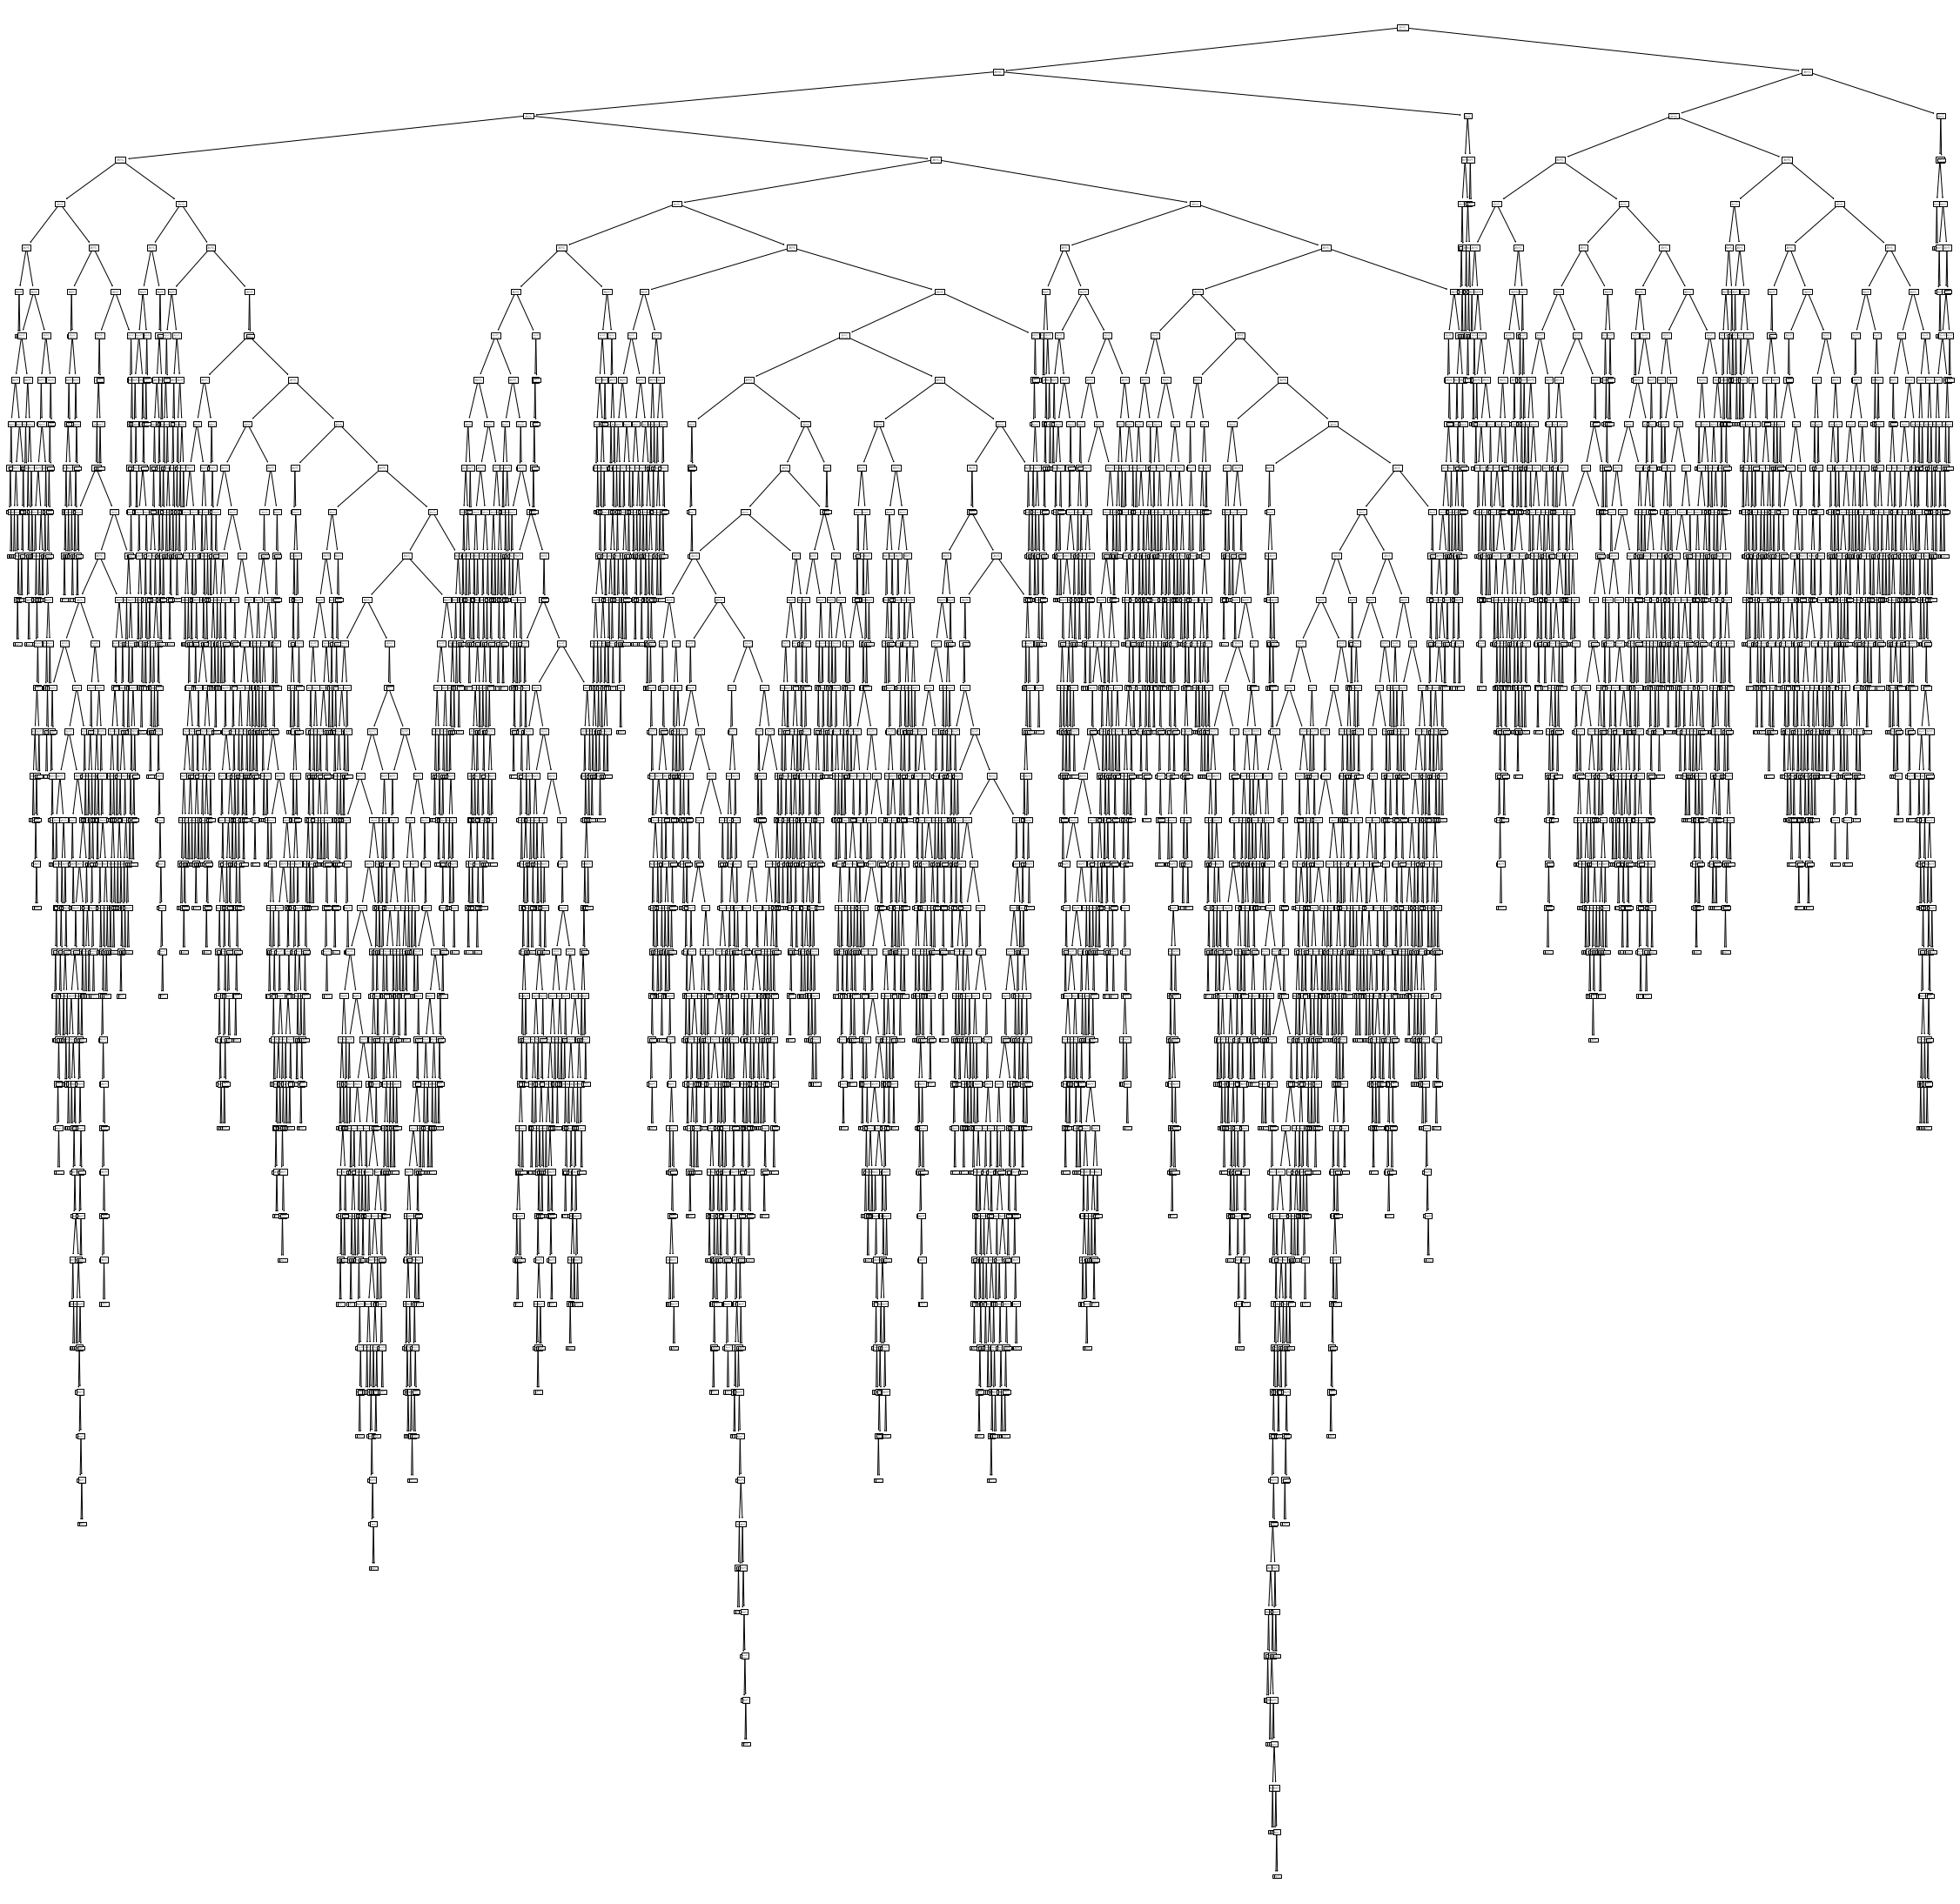

In [123]:
plt.figure(figsize=(40,40))
tree.plot_tree(clffit)
plt.show()

In [124]:
y_predict = clffit.predict(X_test)

In [125]:
cm_tree = pd.crosstab(y_test, y_predict,
                     rownames=['Actual'],
                     colnames=['Predicted'],
                     margins=True)

In [126]:
cm_tree

Predicted,0,1,All
Actual,,,
0,6096,960,7056
1,849,968,1817
All,6945,1928,8873


In [127]:
confusion_matrix(y_test, y_predict)

array([[6096,  960],
       [ 849,  968]], dtype=int64)

In [128]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7056
           1       0.50      0.53      0.52      1817

    accuracy                           0.80      8873
   macro avg       0.69      0.70      0.69      8873
weighted avg       0.80      0.80      0.80      8873



In [129]:
accuracy_score(y_test, y_predict)

0.7961230699876028